### The main aim of this kernel is to use Linear regression in order to figure out how to maximize the Yearly Amount spent by the customers.

In [50]:
# loading the library

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [51]:
df=pd.read_csv('Ecommerce Customers.csv')
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [3]:
df.tail()

Email  \
495  lewisjessica@craig-evans.com   
496           katrina56@gmail.com   
497            dale88@hotmail.com   
498           cwilson@hotmail.com   
499     hannahwilson@davidson.com   

                                               Address         Avatar  \
495  4483 Jones Motorway Suite 872\nLake Jamiefurt,...            Tan   
496  172 Owen Divide Suite 497\nWest Richard, CA 19320  PaleVioletRed   
497  0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...       Cornsilk   
498  680 Jennifer Lodge Apt. 808\nBrendachester, TX...           Teal   
499  49791 Rachel Heights Apt. 898\nEast Drewboroug...    DarkMagenta   

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642

In [4]:
df.shape

(500, 8)

In [6]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [8]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


We see that Time on App, Time of Website , Length of membership ,Year amount Spent are numeric objects. We will start finding out the distribution between these attributes with Yearly amount spent.

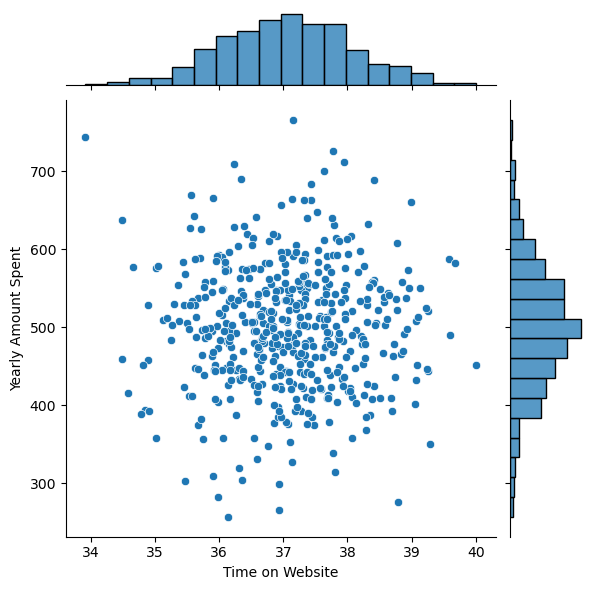

In [37]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)
plt.show()

In [53]:
df[['Time on Website','Yearly Amount Spent']].describe()


Time on Website  Yearly Amount Spent
count       500.000000           500.000000
mean         37.060445           499.314038
std           1.010489            79.314782
min          33.913847           256.670582
25%          36.349257           445.038277
50%          37.069367           498.887875
75%          37.716432           549.313828
max          40.005182           765.518462

As you can see , the upper and lower quartiles of the two attributes plotted are show. Most of the points are plotted from the range of the upper and lower quartiles of both attributes resulting in higher and stable bins of the histogram and conjusted data points between x( 36 to 37.8) and y( 445 to 560).

Now let us check with other attriubtes and write down the inferences.

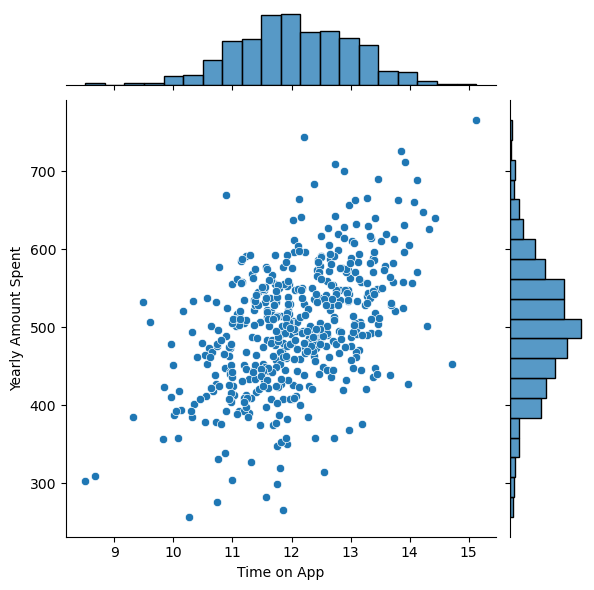

In [38]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)
plt.show()

In [54]:
df[['Time on App','Yearly Amount Spent']].describe()

Time on App  Yearly Amount Spent
count   500.000000           500.000000
mean     12.052488           499.314038
std       0.994216            79.314782
min       8.508152           256.670582
25%      11.388153           445.038277
50%      11.983231           498.887875
75%      12.753850           549.313828
max      15.126994           765.518462

Now you can see the most time spent of app from the 11 to 12.8 approximately by seeing the concenteration of data points and the width of the bins of the histogram. We can also infer that people who are spending the time on app from 11 to 12 are buying more products of more value. But this inference is the trend of this dataset and cannot be assumend for the whole trend of the e-commerece website in general.

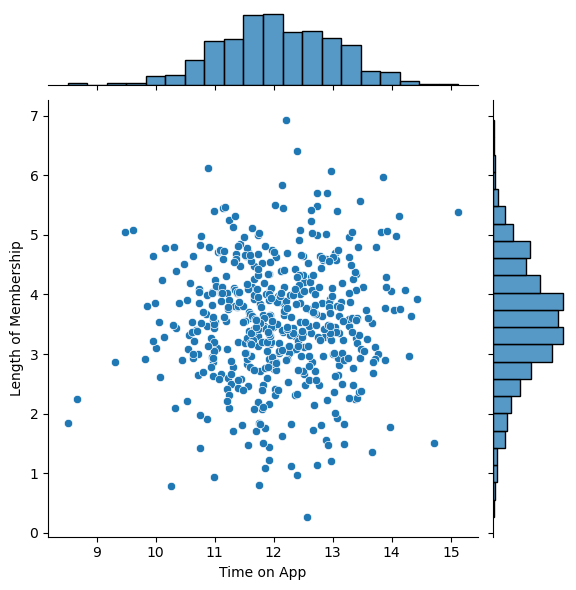

In [40]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df)
plt.show()

In [56]:
df[['Time on App','Length of Membership']].describe()

Time on App  Length of Membership
count   500.000000            500.000000
mean     12.052488              3.533462
std       0.994216              0.999278
min       8.508152              0.269901
25%      11.388153              2.930450
50%      11.983231              3.533975
75%      12.753850              4.126502
max      15.126994              6.922689

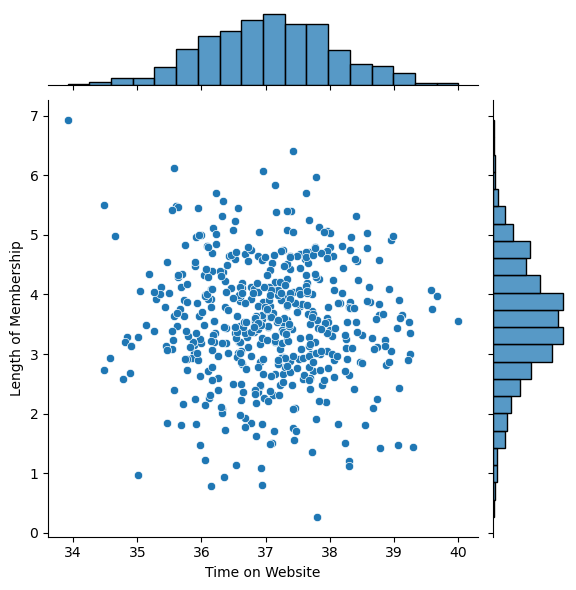

In [42]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=df)
plt.show()

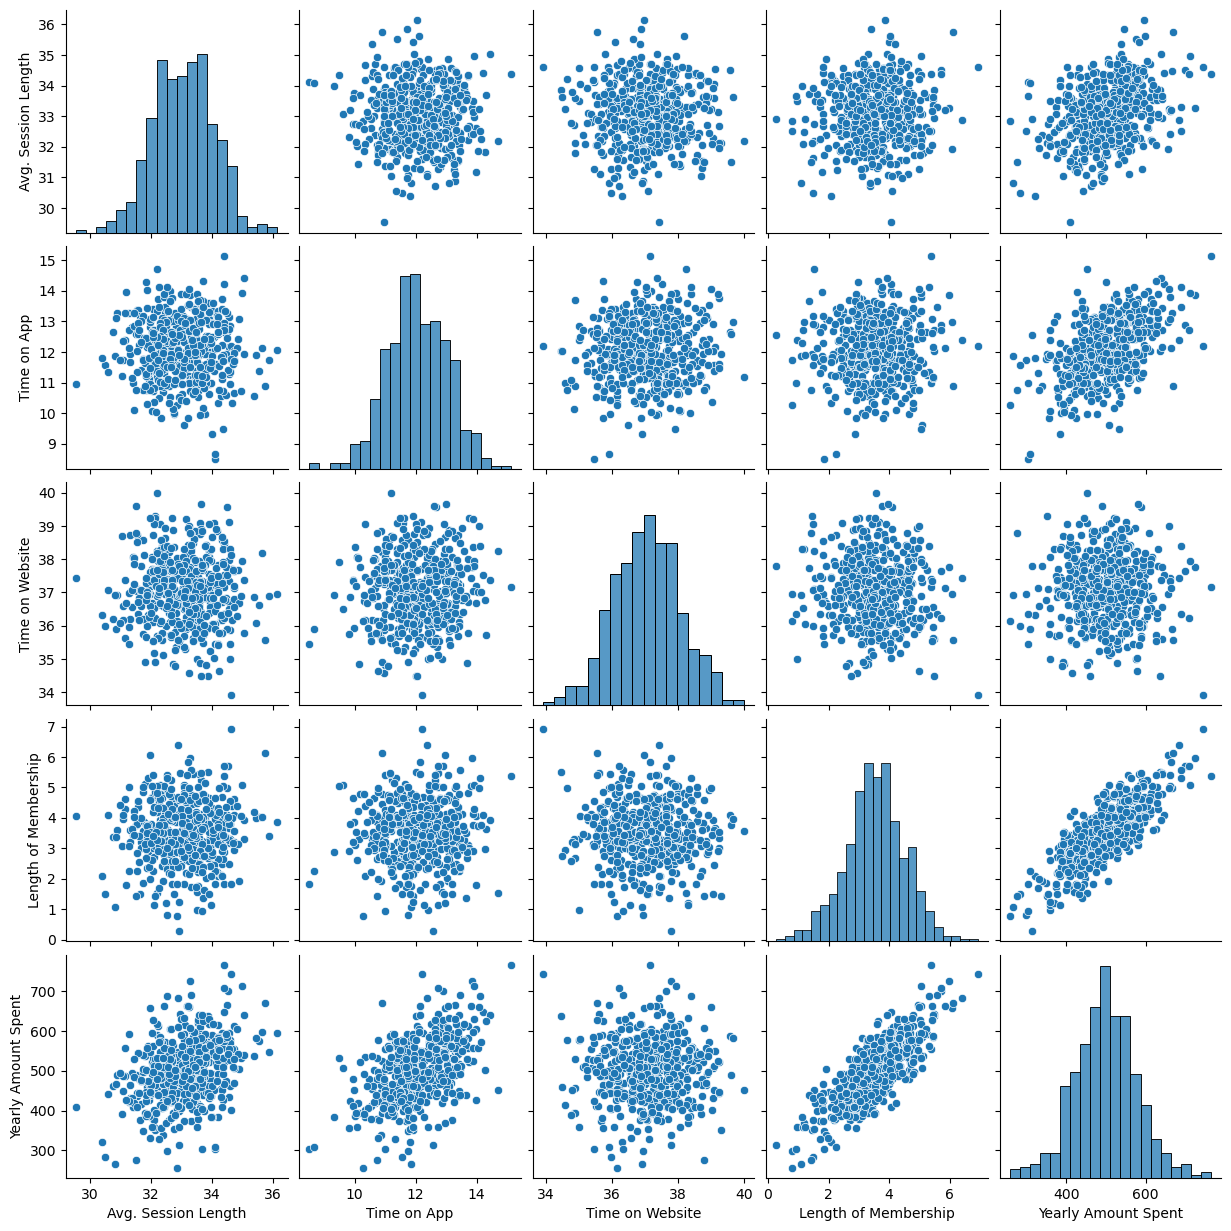

In [9]:
sns.pairplot(df)

### Observation
From the pairplot above we can observe that the length of membership is most closely related to the yearly amount spent by the consumers.

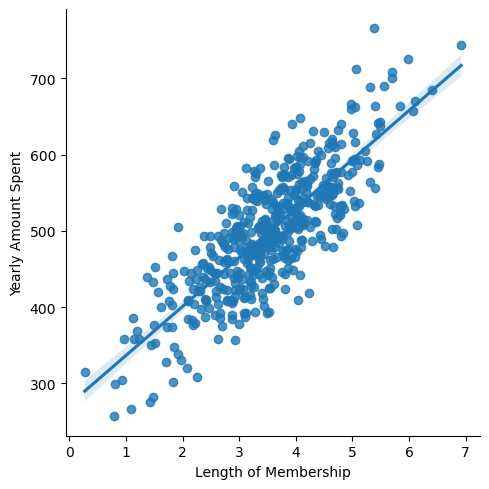

In [44]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)
plt.show()

<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

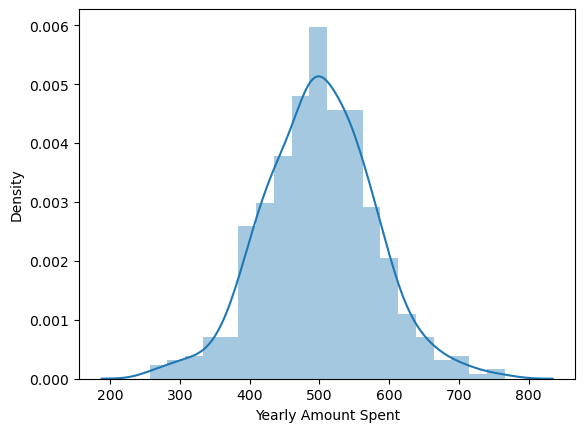

In [35]:
sns.distplot(df['Yearly Amount Spent'])

### The data is in normal distribution.

<Axes: >

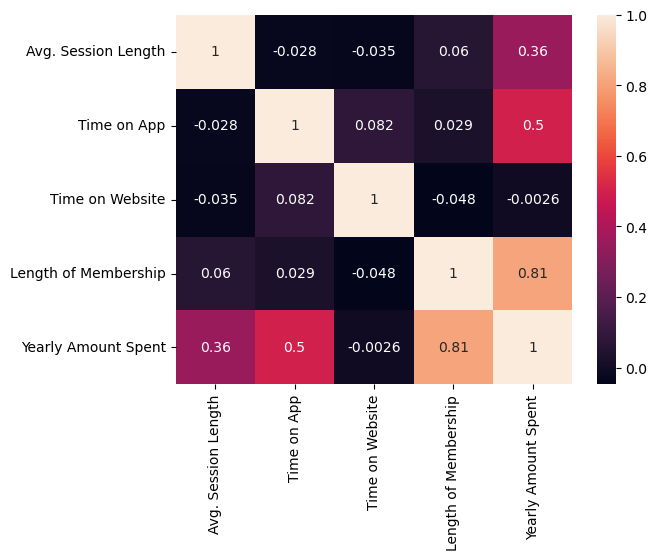

In [11]:
sns.heatmap(df[df.describe().columns].corr(),annot=True)

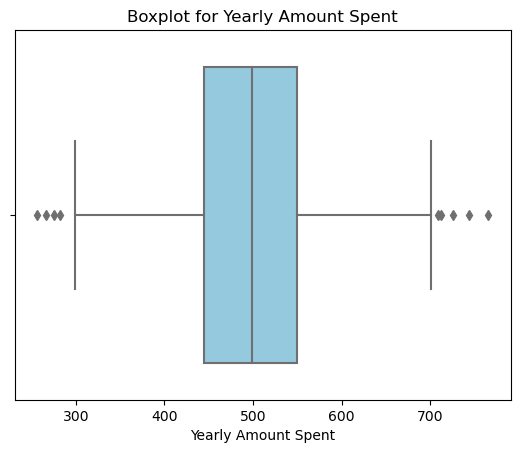

In [46]:
sns.boxplot(x='Yearly Amount Spent', data=df, color='skyblue')
plt.title('Boxplot for Yearly Amount Spent')
plt.xlabel('Yearly Amount Spent')
plt.show()

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

In [14]:
df.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [15]:
X=df.drop('Yearly Amount Spent',axis=1)
X.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership
0            34.497268    12.655651        39.577668              4.082621
1            31.926272    11.109461        37.268959              2.664034
2            33.000915    11.330278        37.110597              4.104543
3            34.305557    13.717514        36.721283              3.120179
4            33.330673    12.795189        37.536653              4.446308

In [16]:
y=df['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test,=train_test_split(X,y,test_size=0.20,random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [19]:
print('X_train =',X_train.shape)
print('X_test =',X_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

X_train = (400, 4)
X_test = (100, 4)
y_train = (400,)
y_test = (100,)


In [20]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
sgdr.fit(X_train,y_train)
score=sgdr.score(X_train,y_train)
print('R-squared =',score)

R-squared = 0.9837377280163266


In [21]:
from sklearn.metrics import r2_score
y_test_pred=sgdr.predict(X_test)
r2_score(y_test,y_test_pred)

0.9861977019635187

In [22]:
y_pred=sgdr.predict(X_test)
from sklearn.metrics import mean_squared_error          
mse=mean_squared_error(y_test,y_pred)
print('MSE =',mse)
print('RMSE =',np.sqrt(mse))

MSE = 92.85461046711909
RMSE = 9.636109716432202


In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)

train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)
print('train_mse =',train_mse)
print('test_mse =',test_mse)
 
train_r2_score=r2_score(y_train,train_pred)
test_r2_score=r2_score(y_test,test_pred)
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)

train_mse = 99.99176761357187
test_mse = 92.89010304498487
train_r2_score = 0.9837380400055443
test_r2_score = 0.9861924261981548


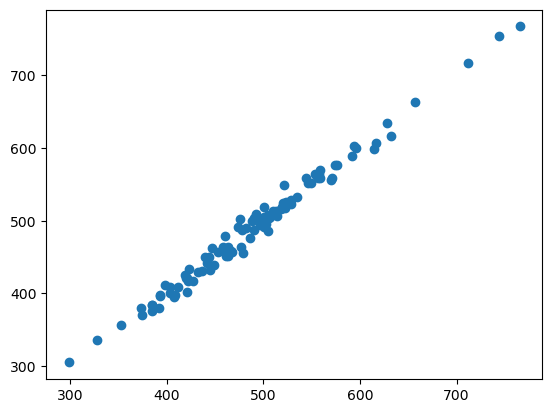

In [24]:
y_pred=lr.predict(X_test)
plt.scatter(y_test,y_pred)

we are comparing y_test with y_pred value and it shows that they are forming a line sp there is a decent correlation .

In [25]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols  # ordinary least squares
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [26]:
df.shape

(500, 5)

In [27]:
500*0.20

100.0

In [28]:
500-100

400

In [29]:
trn=df.iloc[0:400,]
tst=df.iloc[400:,]

In [30]:
trn.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [31]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [32]:
trn

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0              34.497268    12.655651        39.577668              4.082621   
1              31.926272    11.109461        37.268959              2.664034   
2              33.000915    11.330278        37.110597              4.104543   
3              34.305557    13.717514        36.721283              3.120179   
4              33.330673    12.795189        37.536653              4.446308   
..                   ...          ...              ...                   ...   
395            31.445972    12.846499        37.869217              3.420150   
396            35.742670    10.889828        35.565436              6.115199   
397            34.012619    12.914570        36.046204              3.488030   
398            34.140393    11.568527        38.918749              4.082855   
399            32.377990    11.971751        37.199368              2.829700   

     Yearly Amount Spent  
0             587.951054  
1             392.204933  
2             487.547505  
3             581.852344  
4             599.406092  
..                   ...  
395           484.876965  
396           669.987141  
397           547.709989  
398           537.825282  
399           408.216902  

[400 rows x 5 columns]

In [33]:
tst

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
400            33.172331    13.078692        37.329819              5.405406   
401            33.247322    11.956426        36.517346              3.451751   
402            33.598913    13.252737        37.305961              2.935577   
403            33.085298    13.093537        38.315648              4.750360   
404            32.278443    12.527472        36.688367              3.531402   
..                   ...          ...              ...                   ...   
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
400           663.074818  
401           506.375867  
402           528.419330  
403           632.123588  
404           488.270298  
..                   ...  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642  

[100 rows x 5 columns]

In [48]:
cdf=pd.DataFrame(lr.coef_,X.columns,columns=['Coeff'] )
cdf

Coeff
Avg. Session Length   24.645953
Time on App           38.304350
Time on Website        0.479785
Length of Membership  60.583033

Holding all the other features fixed, 1 unit increase in Avg. Session Length is associated with an increase of 24.64 total dollars spent.


Holding all the other features fixed, 1 unit increase in Time on App is associated with an increase of 38.30 total dollars spent.


Holding all the other features fixed, 1 unit increase in Time on Website is associated with an increase of 0.47 total dollars spent.


Holding all the other features fixed, 1 unit increase in Length of Membership is associated with an increase of 60.58 total dollars spent.

Using the predictions above we can develop ways in order to increase yearly amount spent by the customers. We can improve the app experience so that the users spend more of their time on the app or we can also focus on the website and develop it so that it becomes as efficient as the app or we can focus on customer relationship so that people remain members for long periods of time.